In [1]:
plot(arange(5))

NameError: name 'plot' is not defined

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [30]:
%matplotlib inline

NameError: name 'arange' is not defined

In [6]:
df = pd.read_csv("/home/sola/Core_learning/Python3/LoanPrediction/train.csv")

In [7]:
head(df)

NameError: name 'head' is not defined

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [26]:
df.isnull().sum()  #Missing values
#Gender,Dependents,Self_Employed,loanAmount,Loan_Amount_Term,credit_History has missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

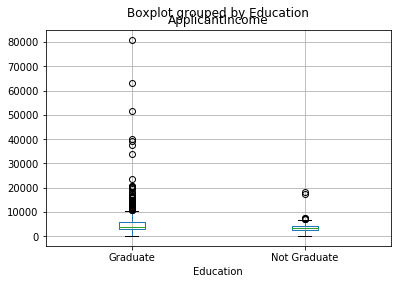

In [120]:
df.boxplot(column='ApplicantIncome',by='Education')

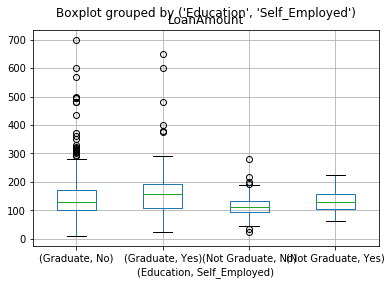

In [127]:
df.boxplot(column="LoanAmount",by=('Education','Self_Employed'))#Box plot shows,Self Employed with No has more values

In [130]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [133]:
df['Self_Employed'].fillna('No',inplace=True)  #Handling Missing values of Self_Employed
df['Self_Employed'].isna().sum()

0

In [135]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [171]:
df['Married'].fillna('Yes',inplace=True)  #Handling Missing values of Gender
df['Married'].isna().sum()

0

In [174]:
df['Dependents'].tail()

609     0
610    3+
611     1
612     2
613     0
Name: Dependents, dtype: object

In [177]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)  #Handling Missing values of Gender
df['Dependents'].isna().sum()

0

In [180]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Credit_History'].isna().sum()

0

In [184]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Loan_Amount_Term'].isna().sum()


0

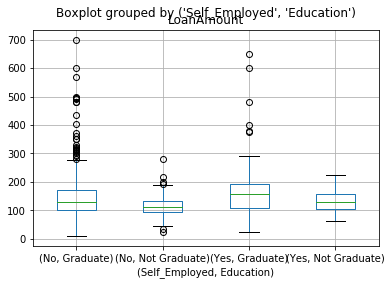

In [161]:
df.boxplot(column='LoanAmount',by=('Self_Employed','Education'))

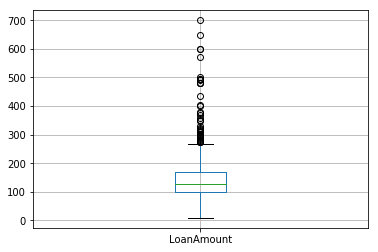

In [139]:
#Handling Missing values of Loan Amount
#As it is a Continuos/Numerical variable,it has to be handled through Mean/Median
#if the data has outliers,its better to go with Median else Mean
df.boxplot(column='LoanAmount') #Here the data has many outliers


In [149]:
table = df.pivot_table( values='LoanAmount', index='Self_Employed' ,columns='Education',aggfunc=np.median) #As it has Outliers,going with median

In [151]:
table


Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [153]:
def func(x):
    return table.loc[x['Self_Employed'],x['Education']]


In [165]:
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(func, axis=1), inplace=True)
df['LoanAmount'].isna().sum()

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

In [167]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

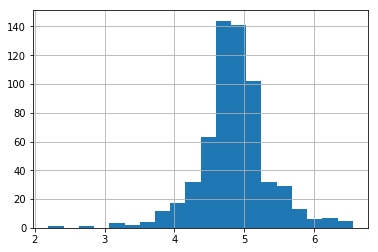

In [169]:
df['LoanAmount_log'].hist(bins=20)

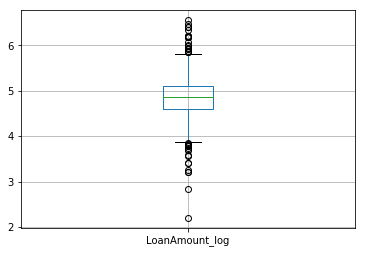

In [185]:
df.boxplot(column='LoanAmount_log')

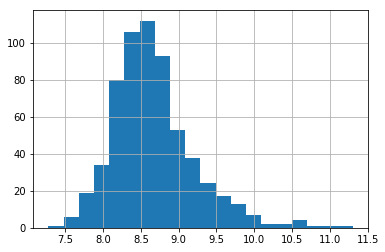

In [191]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

In [193]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [196]:
df['LoanAmount']/df['TotalIncome']

0      0.022226
1      0.021015
2      0.022000
3      0.024287
4      0.023500
5      0.027775
6      0.024682
7      0.028520
8      0.030369
9      0.014658
10     0.017949
11     0.025115
12     0.017891
13     0.024291
14     0.007128
15     0.025253
16     0.027809
17     0.021652
18     0.027215
19     0.018852
20     0.013577
21     0.027202
22     0.025715
23     0.021204
24     0.022734
25     0.019979
26     0.024149
27     0.020889
28     0.024272
29     0.020573
         ...   
584    0.031037
585    0.023617
586    0.027232
587    0.032333
588    0.019789
589    0.038885
590    0.008728
591    0.034167
592    0.031207
593    0.019835
594    0.016129
595    0.028698
596    0.025328
597    0.029461
598    0.018067
599    0.033218
600    0.008317
601    0.027260
602    0.022444
603    0.021562
604    0.041333
605    0.018226
606    0.029322
607    0.029085
608    0.020841
609    0.024483
610    0.009742
611    0.030438
612    0.024660
613    0.029020
Length: 614, dtype: floa

In [197]:
df['Income_Capability']=df['LoanAmount']/df['TotalIncome']

In [198]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Income_Capability
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534,5849.0,8.674026,0.022226
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,0.023500


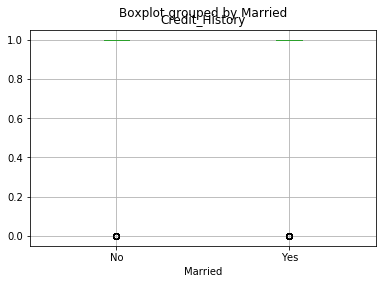

In [52]:
df.boxplot(column='Credit_History',by='Married')

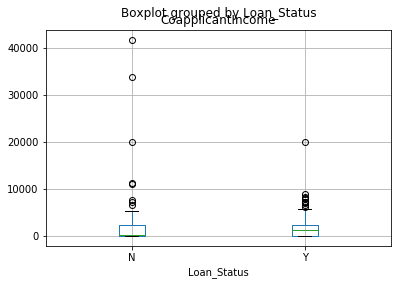

In [58]:
df.boxplot(column='CoapplicantIncome',by='Loan_Status')

In [61]:
temp1 = df['Credit_History'].value_counts()
print(temp1)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [75]:
temp2 = df.pivot_table(index=['Credit_History'],values="Loan_Status",aggfunc = lambda x:x.map({'Y':1,'N': 0}).mean())
print(temp2)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


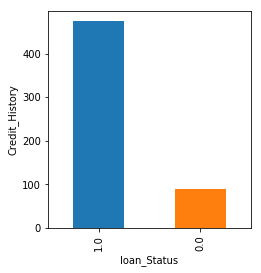

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("loan_Status")
ax1.set_ylabel("Credit_History")
temp1.plot(kind='bar')

<Figure size 576x288 with 0 Axes>

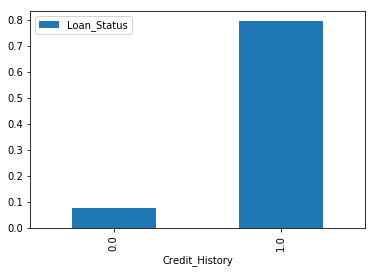

In [85]:
ig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(122)
ax1.set_xlabel("loan_Status")
ax1.set_ylabel("Credit_History")
temp2.plot(kind='bar')

In [111]:
temp3=pd.crosstab(df.loc[:'Credit_History','Gender'], df['Loan_Status'])
temp3


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
temp4=pd.crosstab(df['Credit_History'], df.loc[:'Gender','Loan_Status'])
temp4

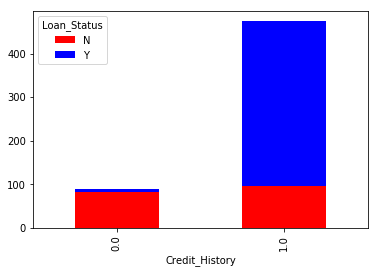

In [118]:
temp4.plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

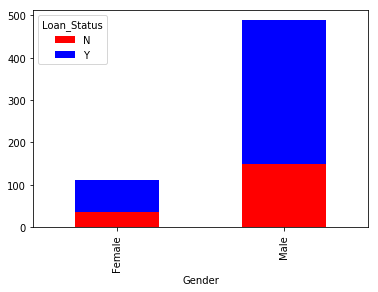

In [110]:
temp3.plot(kind="bar",stacked=True,color=['red','blue'],grid=False)

In [250]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [199]:
from sklearn.preprocessing import LabelEncoder

In [201]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [214]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

df.dtypes 

    


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Income_Capability    float64
dtype: object

In [215]:
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [217]:
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Income_Capability    float64
dtype: object

In [219]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Income_Capability
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026,0.022226
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568,0.021015
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368,0.022000
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323,0.024287
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515,0.023500


In [226]:
from sklearn.model_selection import train_test_split


In [261]:
def classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("accuracy is:%s"  % accuracy)
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=2, random_state=None, shuffle=False)
    error = []
    for train, test in kf.split(data):
    # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])                 

In [ ]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)